# Dubrow and Divachi 2013
**TODO**: Describe experiment and the implementation of the simulations

**TODO**: Clean up this simluations and re-run simluations for inteligability


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from tqdm import tnrange
from simulations.exp_dubrow import batch, generate_experiment

sns.set_context('paper', font_scale=1.5)

Using TensorFlow backend.


TensorFlow Version: 1.9.0
Keras      Version: 2.2.0


In [2]:
# set the parameters, all of them!

# SEM parameters
df0 = 100
scale0 = .2

lmda = 1.0  # stickyness parameter
alfa = 1.  # concentration parameter

f_class = KerasMultiLayerPerceptron
f_opts=dict(var_scale0=scale0, var_df0=df0)

# create the corrupted memory trace
# noise parameters
b = 2
tau = 0.1
print("tau: {}".format(tau))

# set the parameters for the Gibbs sampler
gibbs_kwargs = dict(
    memory_alpha = 0.1,
    memory_lambda = 1.0,
    memory_epsilon = np.exp(-11),
    b = b,  # re-defined here for completeness
    tau = tau,  # ibid
    n_samples = 250,
    n_burnin = 100,
    leave_progress_bar=False,
)

epsilon_e = 0.25

tau: 0.1


Run SEM:   0%|          | 0/5 [00:00<?, ?it/s]

Prior variance (mode): 0.196078431373
Median Feature variance: 0.0495570571694


Run SEM: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


[0 1 0 1 0]


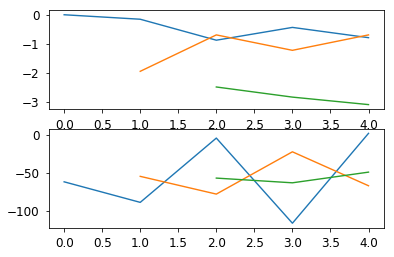

In [3]:
# spot-check the segementation ability

x_list_items, e_tokens = generate_experiment()

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))
print("Median Feature variance: {}".format(np.median(np.var(np.concatenate(x_list_items), axis=0))))

sem_kwargs = dict(
    lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts
)

sem = SEM(**sem_kwargs)
sem.run_w_boundaries(list_events=x_list_items)
print sem.results.e_hat

fig, axes = plt.subplots(2, 1)
axes[0].plot(sem.results.log_prior)
axes[1].plot(sem.results.log_like)
plt.show()

In [4]:
n_batch = 25

results = []
for ii in tnrange(n_batch):
    results.append(batch(sem_kwargs, gibbs_kwargs, epsilon_e, batch_n=ii))
results = pd.concat(results)

/anaconda3/envs/sem/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/sem/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=2.191844076654744, pvalue=0.033274024143985025)


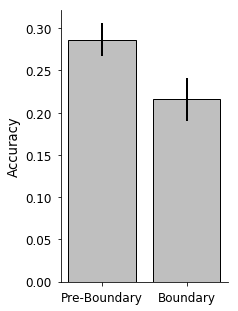

In [5]:
x = results.mean()[['Pre-Boundary', 'Boundary']].index
y = results.mean()[['Pre-Boundary', 'Boundary']]
y_err = results.std()[['Pre-Boundary', 'Boundary']] / np.sqrt(n_batch)
plt.figure(figsize=(3, 5))
plt.bar(x, y, lw=1, edgecolor='k', facecolor=[0.75,0.75,0.75])
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Accuracy')
sns.despine()

from scipy.stats import ttest_ind
print ttest_ind(results['Pre-Boundary'].values, results['Boundary'].values)

Ttest_indResult(statistic=-4.702461072428165, pvalue=4.161852481589964e-05)


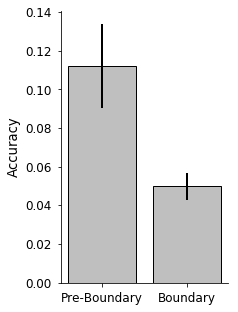

In [13]:
x = ['Pre-Boundary', 'Boundary']
y = results.mean()[['Transitions Pre-Boundary', 'Transitions Boundary']]
y_err = results.std()[['Transitions Pre-Boundary', 'Transitions Boundary']] / np.sqrt(n_batch)
plt.figure(figsize=(3, 5))
plt.bar(x, y, lw=1, edgecolor='k', facecolor=[0.75,0.75,0.75])
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Accuracy')
sns.despine()

from scipy.stats import ttest_ind
print ttest_ind(results['Transitions Pre-Boundary'].values[~np.isnan(results['Transitions Pre-Boundary']).values],
                results['Pre-Boundary'].values[~np.isnan(results['Pre-Boundary']).values],)

/anaconda3/envs/sem/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/sem/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


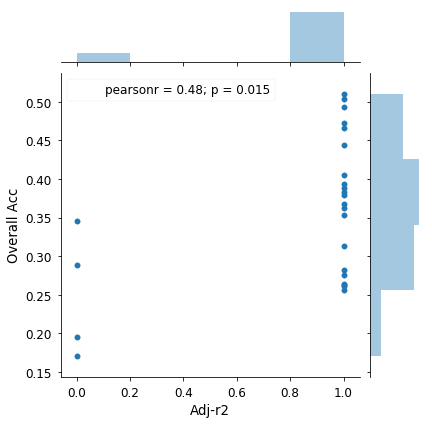

In [14]:
sns.jointplot(x='Adj-r2', y='Overall Acc', data=results)

Ttest_indResult(statistic=2.191844076654744, pvalue=0.033274024143985025)


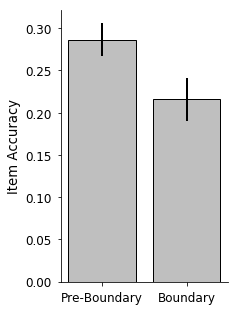

In [15]:
x = ['Pre-Boundary', 'Boundary']
y = results.mean()[['Pre-boundary Acc', 'Boundary Acc']]
y_err = results.std()[['Pre-boundary Acc', 'Boundary Acc']] / np.sqrt(n_batch)
plt.figure(figsize=(3, 5))
plt.bar(x, y, lw=1, edgecolor='k', facecolor=[0.75,0.75,0.75])
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Item Accuracy')
sns.despine()

from scipy.stats import ttest_ind
print ttest_ind(results['Pre-boundary Acc'].values, results['Boundary Acc'].values)